## Import Statements

In [4]:
import pysptools.util as util
import pandas as pd
import matplotlib.pyplot as plt
from spectral import *
import numpy as np
import pysptools.eea as eea
import spectral.io.envi as envi
import pysptools.eea as eea
import pysptools.abundance_maps as amp
import pysptools.classification as cls
import pysptools.noise as ns
import pysptools.skl as skl
import timeit

In [5]:
im = plt.imread('methane.png')

![title](methane.png)

## Ground Truth  

In [6]:
import h5py
import numpy as np

/Users/aravind/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
f = h5py.File('CMF_Aliso2.hdf5','r')

In [8]:
def keys(f):
    return [key for key in f.keys()]

In [9]:
keys(f)

['CH4', 'NH3']

In [10]:
CMF = f['CH4']
list(CMF.items())

[('CH4_CMF1', <HDF5 dataset "CH4_CMF1": shape (4691, 512), type "<f4">),
 ('CH4_CMF2', <HDF5 dataset "CH4_CMF2": shape (4691, 512), type "<f4">)]

In [11]:
CMF1 = f['/CH4/CH4_CMF1'].value
CMF2 = f['/CH4/CH4_CMF2'].value

In [12]:
print(CMF1)

[[0.5685435  0.57080823 0.51485777 ... 0.66495925 0.6391505  0.5297535 ]
 [0.543976   0.5495848  0.5270837  ... 0.6401277  0.5489909  0.58725893]
 [0.5287693  0.5009407  0.5651097  ... 0.6143437  0.63347954 0.6025978 ]
 ...
 [0.57937366 0.5935399  0.5906332  ... 0.58859617 0.59605455 0.5776629 ]
 [0.56260836 0.5704219  0.57861775 ... 0.57966816 0.561252   0.56695867]
 [0.5792128  0.6718984  0.6497966  ... 0.65169275 0.5787296  0.564224  ]]


In [13]:
print(CMF1)

[[0.5685435  0.57080823 0.51485777 ... 0.66495925 0.6391505  0.5297535 ]
 [0.543976   0.5495848  0.5270837  ... 0.6401277  0.5489909  0.58725893]
 [0.5287693  0.5009407  0.5651097  ... 0.6143437  0.63347954 0.6025978 ]
 ...
 [0.57937366 0.5935399  0.5906332  ... 0.58859617 0.59605455 0.5776629 ]
 [0.56260836 0.5704219  0.57861775 ... 0.57966816 0.561252   0.56695867]
 [0.5792128  0.6718984  0.6497966  ... 0.65169275 0.5787296  0.564224  ]]


In [14]:
for i in range(0,CMF2.shape[0]):
    for j in range(0,CMF2.shape[1]):
        if(CMF2[i][j]!=0.0):
            CMF2[i][j]=1

In [14]:
np.save('GT_Aliso2.npy',CMF2)

In [15]:
CMF2.shape

(4691, 512)

In [17]:
k = h5py.File('Conc_Aliso2.he5','r')

In [18]:
keys(k)

['HDFEOS']

In [50]:
Methane_conc = k['/HDFEOS/SWATHS/HyTES_CH4_Retrieval/Data Fields/CH4'].value
Methane_pixel = k['/HDFEOS/SWATHS/HyTES_CH4_Retrieval/Data Fields/pixel_size'].value
Methane_col = k['/HDFEOS/SWATHS/HyTES_CH4_Retrieval/Data Fields/dCH4'].value
Methane_lat = k['/HDFEOS/SWATHS/HyTES_CH4_Retrieval/Geolocation Fields/Lat'].value
Methane_lon = k['/HDFEOS/SWATHS/HyTES_CH4_Retrieval/Geolocation Fields/Lon'].value

In [168]:
print(Methane_lat[0][0],Methane_lon[[0][0]])
np.save('Methane_conc.npy',Methane_conc)

34.314453 [-118.56555  -118.56548  -118.56541  -118.56534  -118.56528  -118.56521
 -118.56514  -118.56508  -118.56501  -118.56495  -118.56489  -118.56483
 -118.56476  -118.5647   -118.56464  -118.564575 -118.56452  -118.56446
 -118.5644   -118.56434  -118.564285 -118.564224 -118.56416  -118.5641
 -118.56405  -118.56399  -118.56393  -118.56387  -118.56381  -118.56375
 -118.5637   -118.56364  -118.563576 -118.563515 -118.56346  -118.56338
 -118.563324 -118.56326  -118.5632   -118.56314  -118.56308  -118.56302
 -118.562965 -118.562904 -118.56284  -118.562775 -118.56271  -118.56265
 -118.56259  -118.56253  -118.56246  -118.5624   -118.56234  -118.56227
 -118.56221  -118.56214  -118.56208  -118.56201  -118.56194  -118.561874
 -118.561806 -118.56174  -118.56167  -118.5616   -118.56153  -118.56146
 -118.561386 -118.56132  -118.56124  -118.56117  -118.561104 -118.561035
 -118.56097  -118.5609   -118.56083  -118.56075  -118.56068  -118.56061
 -118.560524 -118.56045  -118.56037  -118.5603   -118

## Define Spatial Cut Functions

In [153]:
del_arr = []
del_arr_Y =[]

In [154]:
def array_cut_Y(X,Y):
    for i in range(X,Y):
        del_arr_Y.append(i)
    return del_arr_Y

In [155]:
def array_cut(X,Y):
    for i in range(X,Y):
        del_arr.append(i)
    return del_arr

In [68]:
premier_cut = np.load('dX.npy')

In [157]:
del_arr_ = array_cut(0,2426)
del_arr = array_cut(4180,4691)

In [158]:
CMF2 = np.delete(CMF2,del_arr,0)
im=np.delete(im,del_arr,0)

In [ ]:
del_arr_1 = array_cut_Y(270,512)
after_cut_1 = np.delete(after_cut,del_arr_1,1)
im=np.delete(im,del_arr_Y,1)
CMF2=np.delete(CMF2,del_arr_Y,1)
after_cut_1.shape

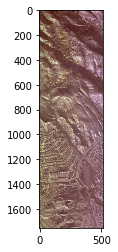

In [159]:
view = imshow(premier_cut, (29, 19, 9))

In [80]:
premier_cut.shape

(1754, 512, 256)

In [160]:
im.shape

(1754, 512, 3)

In [161]:
CMF2.shape

(1754, 512)

14.167667
1.4167902
0.916790246963501
14.667667388916016
[ 1.41679025  2.41679025  3.41679025  4.41679025  5.41679025  6.41679025
  7.41679025  8.41679025  9.41679025 10.41679025 11.41679025 12.41679025
 13.41679025 14.41679025]


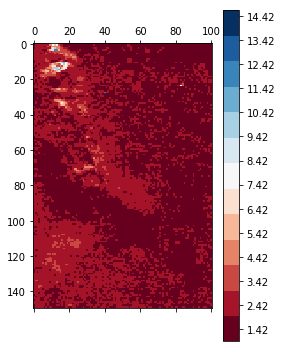

In [172]:
def discrete_matshow(data):
    cmap = plt.get_cmap('RdBu', np.max(data)-np.min(data)+1)
    print(np.max(data))
    print(np.min(data))
    mat = plt.matshow(data,cmap=cmap,vmin = np.min(data)-.5, vmax = np.max(data)+.5)
    print(np.min(data)-.5)
    print(np.max(data)+.5)
    cax = plt.colorbar(mat, ticks=np.arange(np.min(data),np.max(data)+1))
    print(np.arange(np.min(data),np.max(data)+1))

discrete_matshow(Methane_conc)

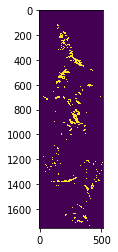

In [165]:
plt.imshow(CMF2)

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.0]
    G: [0.0, 1.0]
    B: [0.003921568859368563, 1.0]

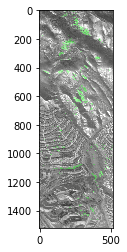

In [87]:
imshow(im)

## Save array after Spatial Removal 

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.0]
    G: [0.0, 1.0]
    B: [0.0, 1.0]

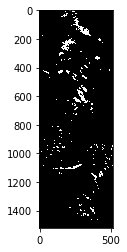

In [101]:
imshow(CMF2)

ImageView object:
  Display bands       :  [0, 128.0, 255]
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.808335781097412, 8.463760375976562]
    G: [5.104734897613525, 11.459613800048828]
    B: [5.804339408874512, 9.129844665527344]

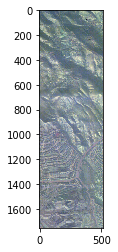

In [60]:
imshow(premier_cut)